In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import requests
from io import BytesIO
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('consump_sar_daily_agg.csv')
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.Electricity_KW_AVG = np.log(df.Electricity_KW_AVG)
df.rename(columns={'Electricity_KW_AVG':'Electricity_Log'}, inplace=True)

In [2]:
df.head(2)

,Date_Time,Weekend,Holiday,School_Day,Electricity_Log,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,...,Day_23,Day_24,Day_25,Day_29,Day_of_week_1,Day_of_week_3,Day_of_week_5,Day_of_week_6,Season_Summer,Season_Winter
0,1991-01-01,1,1,0,6.865481,-18.476732,0.950000,-12.883333,5.208333,-9.441667,...,0,0,0,0,1,0,0,0,0,1
1,1991-01-02,0,0,0,7.309185,-18.411217,0.458333,-14.670833,4.833333,-9.570833,...,0,0,0,0,0,0,0,0,0,1


In [3]:
time = df[['Date_Time', 'Electricity_Log']]
del df['Date_Time']
del df['Electricity_Log']
df.head()

,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,Month_2,...,Day_23,Day_24,Day_25,Day_29,Day_of_week_1,Day_of_week_3,Day_of_week_5,Day_of_week_6,Season_Summer,Season_Winter
0,1,1,0,-18.476732,0.950000,-12.883333,5.208333,-9.441667,8.470833,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,-18.411217,0.458333,-14.670833,4.833333,-9.570833,16.100000,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,-18.339779,0.583333,-11.320833,5.583333,-4.670833,16.100000,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,-18.262442,0.862500,-13.825000,5.083333,-10.016667,8.725000,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,-18.179237,0.554167,-20.070833,3.833333,-16.716667,10.675000,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
scaler = MinMaxScaler()
scaler.fit(df)

exo = pd.DataFrame(scaler.transform(df))

C:\Users\sajor\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
train_time = np.array(time.Electricity_Log[0:292])
test_time = np.array(time.Electricity_Log[292:])
train_exo = np.array(exo[0:292])
test_exo = np.array(exo[292:])

In [6]:
train_time.shape

(292,)

In [7]:
train_exo.shape

(292, 36)

In [75]:
model = SARIMAX(train_time, exog=train_exo, order=(3, 1, 0), seasonal_order=(2, 0, 0, 7))
model_fit = model.fit(disp=True)
fc = model_fit.forecast(73, alpha=0.05, exog = pd.DataFrame(test_exo) )

C:\Users\sajor\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
#test_exo.shape

In [29]:
#fc

In [28]:
#test_time

In [27]:
#np.exp(fc)

In [26]:
#np.exp(test_time)

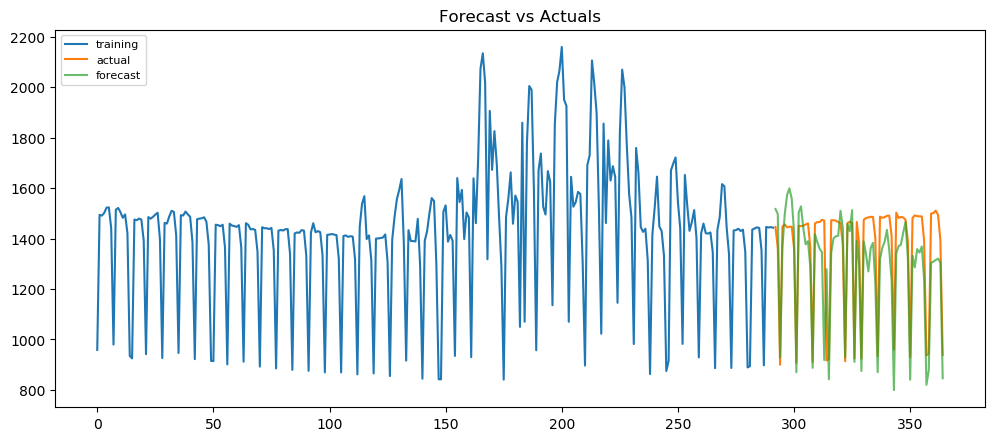

In [76]:
actual = pd.DataFrame(np.exp(test_time))
actual.index = time[292:].index
forecast = pd.DataFrame(np.exp(fc))
forecast.index = actual.index

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(np.exp(train_time), label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.7)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
print(rmse)

from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast.values)
print(r2)

133.45114867717135
0.7089172230698886
